In [1]:
from matplotlib import pyplot as plt
from mxnet import autograd, nd, init, gluon
from mxnet.gluon import data as gdata
from mxnet.gluon import loss as gloss
from mxnet.gluon import nn
from time import time
import d2lzh as d2l
import random
import sys 

# 03. 深度学习基础

## 3.1 线性回归
线性回归输出是⼀个连续值，因此适⽤于回归问题。回归问题在实际中很常⻅，如预测房屋价格、⽓温、销售额等连续值的问题。

与回归问题不同，分类问题中模型的最终输出是⼀个离散值。 我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。 softmax回归则适⽤于分类问题。

由于线性回归和softmax回归都是单层神经⽹络，它们涉及的概念和技术同样适⽤于⼤多数的深度学习模型。我们⾸先以线性回归为例，介绍⼤多数深度学习模型的基本要素和表⽰⽅法。

### 3.3.1 线性回归的基本要素
我们以房屋价格预测作为例⼦来解释线性回归的基本要素。为了简单起⻅，我们假设价格只取决于房屋状况的两个因素，即⾯积(平⽅⽶)和房龄(年)。 

##### 模型
设房屋的⾯积为$x_1$，房龄为$x_2$，售出价格为$y$。线性回归假设输出与各个输⼊之间是线性关系：
+ $\hat{y} = x_1w_1 + x_2w_2 + b$

其中$w_1$和$w_2$是权重(weight)，$b$是偏差(bias)，且均为标量。它们是线性回归模型的参数。模型输出$\hat{y}$是线性回归对真实价格$y$的预测或估计。我们通常允许它们之间有⼀定误差。

##### 模型训练
我们通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作`模型训练`。下⾯我们介绍模型训练所涉及的3个要素。

##### 训练数据
我们通常收集⼀系列的真实数据，例如多栋房屋的真实售出价格和它们对应的⾯积和房龄。我们希望在这个数据上⾯寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语⾥，该数据集被称为`训练数据集`或`训练集`，⼀栋房屋被称为⼀个`样本`，其真实售出价格叫作`标签`，⽤来预测标签的两个因素叫作`特征`。`特征`⽤来表征样本的特点。

假设我们采集的样本数为$n$，索引为$i$的样本的特征为$x_1^{(i)}$和$x_2^{(i)}$，标签为$y^{(i)}$。对于索引为$i$的房屋，线性回归模型的房屋价格预测表达式为
+ $\hat{y}^{(i)} = x_1^{(i)} w_1 + x_2^{(i)} w_2 + b$

##### 损失函数
在模型训练中，我们需要衡量价格预测值与真实值之间的误差。⼀个常⽤的选择是平⽅函数。它在评估索引为$i$的样本误差的表达式为：
+ $\displaystyle\ell^{(i)}(w_1, w_2, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$

显然，误差越小表⽰预测价格与真实价格越相近，且当⼆者相等时误差为0。给定训练数据集，这个误差只与模型参数相关，因此我们将它记为以模型参数为参数的函数。在机器学习⾥，将衡量误差的函数称为`损失函数`(loss function)。这⾥使⽤的平⽅误差函数也称为`平⽅损失`(square loss)。

通常，我们⽤训练数据集中所有样本误差的平均来衡量模型预测的质量，即
+ $\displaystyle\ell(w_1, w_2, b) =\frac{1}{n} \sum_{i=1}^n \ell^{(i)}(w_1, w_2, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right)^2$

在模型训练中，我们希望找出⼀组模型参数，记为$w_1^*, w_2^*, b^*$ ，来使训练样本平均损失最小：
+ $w_1^*, w_2^*, b^* = \operatorname*{argmin}_{w_1, w_2, b}\ \ell(w_1, w_2, b)$

##### 优化算法
当模型和损失函数形式较为简单时，上⾯的误差最小化问题的解可以直接⽤公式表达出来。这类解叫作`解析解`(analytical solution)。线性回归和平⽅误差刚好属于这个范畴。

⼤多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作`数值解`(numerical solution)。

在求数值解的优化算法中，`小批量随机梯度下降`(mini-batch stochastic gradient descent)在深度学习中被⼴泛使⽤。

> `小批量随机梯度下降`算法很简单：
> 先选取⼀组模型参数的初始值，如随机选取；接下来对参数进⾏多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样⼀个由固定数⽬训练数据样本所组成的小批量（mini-batch）$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数(梯度)，最后⽤此结果与预先设定的⼀个正数的乘积作为模型参数在本次迭代的减小量。

在训练本节讨论的线性回归模型的过程中，模型的每个参数将作如下迭代：
$$\begin{aligned} w_1 &\leftarrow w_1 - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b) }{\partial w_1} = w_1 - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_1^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\ w_2 &\leftarrow w_2 - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b) }{\partial w_2} = w_2 - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_2^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\ b &\leftarrow b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b) }{\partial b} = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right) \end{aligned}$$

在上式中，$|\mathcal{B}|$代表每个小批量中的样本个数(批量⼤小，batch size)，$\eta$称作学习率并取正数。这⾥的批量⼤小和学习率的值是`超参数`(hyperparameter)。我们通常所说的`调参`指的正是调节超参数，例如通过反复试错来找到超参数合适的值。在少数情况下，超参数也可以通过模型训练学出。 本书对此类情况不做讨论。

##### 模型预测
模型训练完成后，我们将模型参数$w_1, w_2, b$在优化算法停⽌时的值分别记作$\hat{w}_1, \hat{w}_2, \hat{b}$。注意，这⾥我们得到的并不⼀定是最小化损失函数的最优解$w_1^*, w_2^*, b^*$，而是对最优解的⼀个近似。然后，我们就可以使⽤学出的线性回归模型$x_1 \hat{w}_1 + x_2 \hat{w}_2 + \hat{b}$来估算训练数据集以外任意⼀栋房屋的价格了。这⾥的估算也叫作`模型预测`、`模型推断`或`模型测试`。

### 3.1.2 线性回归的表⽰⽅法
下⾯我们解释线性回归与神经⽹络的联系，以及线性回归的⽮量计算表达式。

##### 神经⽹络图
在深度学习中，我们可以使⽤神经⽹络图直观地表现模型结构。`图3.1`使⽤神经⽹络图表⽰本节中介绍的线性回归模型。神经⽹络图隐去了模型参数权重和偏差。

<img src="images/03_01.png" style="width:350px;"/>

输⼊分别为$x_1$和$x_2$，因此输⼊层的输⼊个数为2。输⼊个数也叫特征数或特征向量维度。输出为$o$，输出层的输出个数为1。我们直接将`图3.1`中神经⽹络的输出$o$作为线性回归的输出，即$\hat{y} = o$。由于输⼊层并不涉及计算，按照惯例，`图3.1`所⽰的神经⽹络的层数为1。所以，线性回归是⼀个单层神经⽹络。输出层中负责计算$o$的单元⼜叫`神经元`。在线性回归中，$o$的计算依赖于$x_1$和$x_2$。也就是说，输出层中的神经元和输⼊层中各个输⼊完全连接。因此，这⾥的输出层⼜叫`全连接层`(fully-connected layer)或`稠密层` (dense layer)。

##### ⽮量计算表达式
在模型训练或预测时，我们常常会同时处理多个数据样本并⽤到⽮量计算。在介绍线性回归的⽮量计算表达式之前，让我们先考虑对两个向量相加的两种⽅法。

In [2]:
a = nd.ones(shape=1000) 
b = nd.ones(shape=1000)

# 向量相加的⼀种⽅法是，将这两个向量按元素逐⼀做标量加法
start = time()
c = nd.zeros(shape=1000) 

for i in range(1000):
    c[i] = a[i] + b[i]

time() - start

0.2809560298919678

In [3]:
# 向量相加的另⼀种⽅法是，将这两个向量直接做⽮量加法
start = time()
d = a + b
time() - start

0.0007598400115966797

让我们再次回到本节的房价预测问题。如果我们对训练数据集⾥的3个房屋样本逐⼀预测价格，将得到
$$\begin{aligned} \hat{y}^{(1)} &= x_1^{(1)} w_1 + x_2^{(1)} w_2 + b\\ \hat{y}^{(2)} &= x_1^{(2)} w_1 + x_2^{(2)} w_2 + b\\ \hat{y}^{(3)} &= x_1^{(3)} w_1 + x_2^{(3)} w_2 + b\end{aligned} $$

我们将上⾯3个等式转化成⽮量计算：
$$\boldsymbol{\hat{\mathcal{y}}} = \begin{bmatrix} \hat{y}^{(1)} \\ \hat{y}^{(2)} \\ \hat{y}^{(3)} \end{bmatrix}, \quad \boldsymbol{X} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)} \end{bmatrix}, \quad \boldsymbol{w} = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$$

对3个房屋样本预测价格的⽮量计算表达式为$\boldsymbol{\hat{\mathcal{y}}} = \boldsymbol{X} \boldsymbol{w} + b$, 其中的加法运算使⽤了⼴播机制：

In [4]:
a = nd.ones(shape=3) 
b = 10 
a + b


[11. 11. 11.]
<NDArray 3 @cpu(0)>

⼴义上讲，当数据样本数为$n$，特征数为$d$时，线性回归的⽮量计算表达式为
+ $\boldsymbol{\hat{\mathcal{y}}} = \boldsymbol{X} \boldsymbol{w} + b$

其中模型输出$\boldsymbol{\hat{\mathcal{y}}} \in \mathbb{R}^{n \times 1}$， 批量数据样本特征$\boldsymbol{X} \in \mathbb{R}^{n \times d}$，权重$\boldsymbol{w} \in \mathbb{R}^{d \times 1}$， 偏差$b \in \mathbb{R}$。相应地，批量数据样本标签$\boldsymbol{\mathcal{y}} \in \mathbb{R}^{n \times 1}$。设模型参数$\boldsymbol{\theta} = [w_1, w_2, b]^\top$，我们可以重写损失函数为
+ $\displaystyle\ell(\boldsymbol{\theta})=\frac{1}{2n}(\hat{y}-y)^\top(\hat{y}-y)$

小批量随机梯度下降的迭代步骤将相应地改写为
+ $\displaystyle\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta})$

其中梯度是损失有关3个为标量的模型参数的偏导数组成的向量：
$$\displaystyle\nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta})= \begin{bmatrix} \frac{ \partial \ell^{(i)}(w_1, w_2, b) }{\partial w_1} \\ \frac{ \partial \ell^{(i)}(w_1, w_2, b) }{\partial w_2} \\ \frac{ \partial \ell^{(i)}(w_1, w_2, b) }{\partial b} \end{bmatrix} = \begin{bmatrix} x_1^{(i)} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}) \\ x_2^{(i)} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}) \\ x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)} \end{bmatrix} = \begin{bmatrix} x_1^{(i)} \\ x_2^{(i)} \\ 1 \end{bmatrix} (\hat{y}^{(i)} - y^{(i)})$$


## 3.2 线性回归的从零开始实现
本节使用NDArray和autograd来实现⼀个线性回归的训练。

### 3.2.1 ⽣成数据集

我们构造⼀个简单的⼈⼯训练数据集。设训练数据集样本数为1000，特征数为2。给定随机⽣成的批量样本特征$\boldsymbol{X} \in \mathbb{R}^{1000 \times 2}$ ，我们使⽤线性回归模型真实权重`w = [2, −3.4]`和偏差`b = 4.2`，以及⼀个随机噪声项$\epsilon$来⽣成标签
+ $y = Xw + b + \epsilon$

其中噪声项$\epsilon$服从均值为0、标准差为0.01的正态分布。噪声代表了数据集中⽆意义的⼲扰。

In [5]:
num_inputs = 2
num_examples = 1000 
true_w = [2, -3.4] 
true_b = 4.2 

features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

features[0], labels[0]

(
 [2.2122064 0.7740038]
 <NDArray 2 @cpu(0)>, 
 [6.000587]
 <NDArray 1 @cpu(0)>)

通过⽣成第⼆个特征`features[:, 1]`和标签的散点图，可以更直观地观察两者间的线性关系。

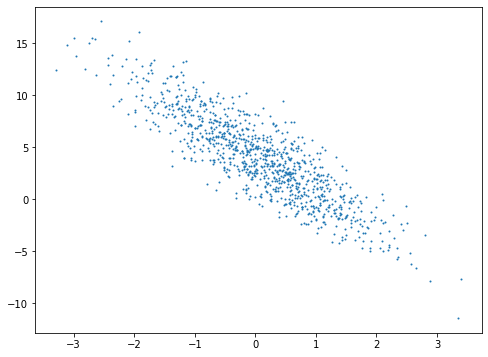

In [6]:
def set_figsize(figsize=(8, 6)):
    # 设置图的尺⼨ 
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)
plt.show()

### 3.2.2 读取数据
在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这⾥我们定义⼀个函数： 它每次返回batch_size个随机样本的特征和标签。

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) 
    random.shuffle(indices) # 样本的读取顺序是随机的 
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)]) 
        yield features.take(j), labels.take(j) # take函数根据索引返回对应元素

# 让我们读取第⼀个小批量数据样本并打印
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y) 
    break


[[-0.32821104  2.5574841 ]
 [-1.5765963  -0.6924825 ]
 [-1.436299   -1.2416507 ]
 [ 1.3843732  -0.10097159]
 [-0.07389027  0.1930282 ]
 [ 0.4842174   0.49286252]
 [ 0.6538188   1.1236147 ]
 [ 1.8117208   0.43412206]
 [-1.4749662  -0.52414197]
 [ 0.5963767   2.4444225 ]]
<NDArray 10x2 @cpu(0)> 
[-5.162362   3.409012   5.559958   7.3219676  3.4034605  3.5086532
  1.6822191  6.364592   3.0414045 -2.9202068]
<NDArray 10 @cpu(0)>


### 3.2.3 初始化模型参数
将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化成0：

In [8]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

之后的模型训练中，需要对这些参数求梯度来迭代参数的值，因此我们需要创建它们的梯度：

In [9]:
w.attach_grad() 
b.attach_grad()

### 3.2.4 定义模型
下⾯是线性回归的⽮量计算表达式的实现。我们使⽤dot函数做矩阵乘法。

In [10]:
def linreg(X, w, b): 
    return nd.dot(X, w) + b

### 3.2.5 定义损失函数
我们使⽤上⼀节描述的平⽅损失来定义线性回归的损失函数。

In [11]:
def squared_loss(y_hat, y): 
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 3.2.6 定义优化算法
以下的`sgd`函数实现了小批量随机梯度下降算法。它通过不断迭代模型参数来优化损失函数。这⾥⾃动求梯度模块计算得来的梯度是⼀个批量样本的梯度和。我们将它除以批量⼤小来得到平均值。

In [12]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

### 3.2.7 训练模型
在训练中，我们将多次迭代模型参数。在每次迭代中，我们根据当前读取的小批量数据样本，通过调⽤反向函数`backward`计算小批量随机梯度，并调⽤优化算法`sgd`迭代模型参数。回忆⼀下`⾃动求梯度`，由于变量`l`并不是⼀个标量，运⾏`l.backward()`将对`l`中元素求和得到新的变量，再求该变量有关模型参数的梯度。

在⼀个迭代周期(epoch)中，我们将完整遍历⼀遍`data_iter`函数，并对训练数据集中所有样本都使⽤⼀次(假设样本数能够被批量⼤小整除)。这⾥的迭代周期个数`num_epochs`和学习率`lr`都是超参数。

In [13]:
lr = 0.03
num_epochs = 3 
net = linreg 
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels) 
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.040421
epoch 2, loss 0.000153
epoch 3, loss 0.000050


训练完成后，我们可以⽐较学到的参数和⽤来⽣成训练集的真实参数，它们应该很接近：

In [14]:
true_w, w

([2, -3.4], 
 [[ 1.9996471]
  [-3.3995755]]
 <NDArray 2x1 @cpu(0)>)

In [15]:
true_b, b

(4.2, 
 [4.199685]
 <NDArray 1 @cpu(0)>)

## 3.3 线性回归的简洁实现
在本节中我们将使⽤MXNet提供的Gluon接口更⽅便地实现线性回归的训练。

### 3.3.1 ⽣成数据集
我们⽣成与上⼀节中相同的数据集。

In [16]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4] 
true_b = 4.2 

features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

### 3.3.2 读取数据
Gluon提供了data包来读取数据。由于data常⽤作变量名，我们将导⼊的data模块⽤添加了Gluon⾸字⺟的假名gdata代替。在每⼀次迭代中，我们将随机读取包含10个数据样本的小批量。

In [17]:
batch_size = 10
dataset = gdata.ArrayDataset(features, labels)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

for X, y in data_iter: 
    print(X, y) 
    break


[[-0.08644813  0.4463387 ]
 [ 2.1249037   0.13337089]
 [ 0.45684785  2.128176  ]
 [-0.12238345 -0.37563345]
 [-0.43713635  2.1147738 ]
 [-1.282888   -0.79065293]
 [-1.8736776  -2.2938728 ]
 [ 0.65449363  1.5194659 ]
 [-0.7422148   1.7780007 ]
 [ 0.39709672  0.28495127]]
<NDArray 10x2 @cpu(0)> 
[ 2.5096772   7.990593   -2.132142    5.226048   -3.86194     4.3202453
  8.248752    0.33974865 -3.339621    4.019619  ]
<NDArray 10 @cpu(0)>


### 3.3.3 定义模型
在上⼀节从零开始的实现中，我们需要定义模型参数，并使⽤它们⼀步步描述模型是怎样计算的。当模型结构变得更复杂时，这些步骤将变得更繁琐。

Gluon提供了⼤量预定义的层，这使我们只需关注使⽤哪些层来构造模型。

在Gluon中，`Sequential`实例可以看作是⼀个串联各个层的容器。在构造模型时，我们在该容器中依次添加层。当给定输⼊数据时，容器中的每⼀层将依次计算并将输出作为下⼀层的输⼊。

In [18]:
net = nn.Sequential()

回顾`图3.1`中线性回归在神经⽹络图中的表⽰。作为⼀个单层神经⽹络，线性回归输出层中的神经元和输⼊层中各个输⼊完全连接。因此，线性回归的输出层⼜叫`全连接层`。

在Gluon中，全连接层是⼀个`Dense`实例。我们定义该层输出个数为1。我们⽆须指定每⼀层输⼊的形状，当模型得到数据时，模型将⾃动推断出每⼀层的输⼊个数。

In [19]:
net.add(nn.Dense(1))

### 3.3.4 初始化模型参数
MXNet的`init`模块提供了模型参数初始化的各种⽅法。我们通过`init.Normal(sigma=0.01)`指定权重参数每个元素将在初始化时随机采样于均值为0、标准差为0.01的正态分布。偏差参数默认会初始化为零。

In [20]:
net.initialize(init.Normal(sigma=0.01))

### 3.3.5 定义损失函数
在Gluon中，`loss`模块定义了各种损失函数。

In [21]:
loss = gloss.L2Loss()

### 3.3.6 定义优化算法
我们也⽆须实现小批量随机梯度下降。在导⼊Gluon后，我们创建⼀个`Trainer`实例，并指定学习率为0.03的小批量随机梯度下降为优化算法。该优化算法将⽤来迭代net实例所有通过add函数嵌套的层所包含的全部参数。这些参数可以通过`collect_params`函数获取。

In [22]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

### 3.3.7 训练模型
在使⽤Gluon训练模型时，我们通过调⽤Trainer实例的step函数来迭代模型参数。

上⼀节中我们提到，由于变量`l`是⻓度为`batch_size`的⼀维NDArray，执⾏`l.backward()`等价于执⾏`l.sum().backward()`。按照小批量随机梯度下降的定义，我们在step函数中指明批量⼤小，从而对批量中样本梯度求平均。

In [23]:
num_epochs = 3

for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y) 
        l.backward() 
        trainer.step(batch_size) 
    l = loss(net(features), labels) 
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.034025
epoch 2, loss: 0.000124
epoch 3, loss: 0.000050


下⾯我们分别⽐较学到的模型参数和真实的模型参数：

In [24]:
dense = net[0] 
true_w, dense.weight.data()

([2, -3.4], 
 [[ 1.999827  -3.4003594]]
 <NDArray 1x2 @cpu(0)>)

In [25]:
true_b, dense.bias.data()

(4.2, 
 [4.199792]
 <NDArray 1 @cpu(0)>)

## 3.4 softmax回归
在另⼀类情景中，模型输出可以是⼀个像图像类别这样的离散值。对于这样的离散值预测问题，我们可以使⽤诸如softmax回归在内的分类模型。和线性回归不同，softmax回归的输出单元从⼀个变成了多个，且引⼊了softmax运算使输出更适合离散值的预测和训练。

### 3.4.1 分类问题
让我们考虑⼀个简单的图像分类问题，其输⼊图像的⾼和宽均为2像素，且⾊彩为灰度。我们将图像中的4像素分别记为$x_1 , x_2 , x_3 , x_4$。假设训练数据集中图像的真实标签为狗、猫或鸡，这些标签分别对应离散值$y_1, y_2, y_3$。

### 3.4.2 softmax回归模型
softmax回归跟线性回归⼀样将输⼊特征与权重做线性叠加。与线性回归的⼀个主要不同在于，softmax回归的输出值个数等于标签⾥的类别数。因为⼀共有4种特征和3种输出动物类别，所以权重包含12个标量、偏差包含3个标量，且对每个输⼊计算$o_1, o_2, o_3$这3个输出：
$$\begin{aligned} o_1 &= x_1 w_{11} + x_2 w_{21} + x_3 w_{31} + x_4 w_{41} + b_1,\\ o_2 &= x_1 w_{12} + x_2 w_{22} + x_3 w_{32} + x_4 w_{42} + b_2,\\ o_3 &= x_1 w_{13} + x_2 w_{23} + x_3 w_{33} + x_4 w_{43} + b_3\end{aligned}$$

`图3.2`⽤神经⽹络图描绘了softmax回归，也是⼀个单层神经⽹络。 由于每个输出$o_1, o_2, o_3$的计算都要依赖于所有的输⼊$x_1 , x_2 , x_3 , x_4$，softmax回归的输出层也是⼀个全连接层。

<img src="images/03_02.png" style="width:400px;"/>

##### softmax运算
既然分类问题需要得到离散的预测输出，一个简单的办法是将输出值$o_i$当作预测类别是$i$的置信度，并将值最大的输出所对应的类作为预测输出。例如，如果$o_1,o_2,o_3$分别为$0.1,10,0.1$，由于$o_2$最大，那么预测类别为2，其代表猫。

然而，直接使用输出层的输出有两个问题：
+ 输出层的输出值的范围不确定，我们难以直观上判断这些值的意义。例如，输出值10表示"很置信"图像类别为猫，因为该输出值是其他两类的输出值的100倍。但如果$o_1=o_3=10^3$，那么输出值10却又表示图像类别为猫的概率很低
+ 由于真实标签是离散值，这些离散值与不确定范围的输出值之间的误差难以衡量

softmax运算符解决了以上两个问题，它将输出值变换成值为正且和为1的概率分布：
+ $\hat{y}_1, \hat{y}_2, \hat{y}_3 = \text{softmax}(o_1, o_2, o_3) $

其中：
+ $\displaystyle \hat{y}_1 = \frac{ \exp(o_1)}{\sum_{i=1}^3 \exp(o_i)}, \quad \hat{y}_2 = \frac{ \exp(o_2)}{\sum_{i=1}^3 \exp(o_i)}, \quad \hat{y}_3 = \frac{ \exp(o_3)}{\sum_{i=1}^3 \exp(o_i)}$

容易看出$\hat{y}_1 + \hat{y}_2 + \hat{y}_3 = 1$且$0 \leq \hat{y}_1, \hat{y}_2, \hat{y}_3 \leq 1$，因此$\hat{y}_1, \hat{y}_2, \hat{y}_3$是一个合法的概率分布。这时候，如果$\hat{y}_2=0.8$，不管$\hat{y}_1$和$\hat{y}_3$的值是多少，我们都知道图像类别为猫的概率是80%。此外，我们注意到
+ $\underset{i}{\arg\max} o_i = \underset{i}{\arg\max} \hat{y}_i$

因此softmax运算不改变预测类别输出。

### 3.4.3 单样本分类的⽮量计算表达式
我们可以将单样本分类通过⽮量计算来表达。在上⾯的图像分类问题中，假设softmax回归的权重和偏差参数分别为
$$ \boldsymbol{W} = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \\ w_{41} & w_{42} & w_{43} \end{bmatrix}, \quad \boldsymbol{b} = \begin{bmatrix} b_1 & b_2 & b_3 \end{bmatrix}$$

设高和宽分别为2个像素的图像样本$i$的特征为
+ $\boldsymbol{x}^{(i)} = \begin{bmatrix}x_1^{(i)} & x_2^{(i)} & x_3^{(i)} & x_4^{(i)}\end{bmatrix}$

输出层的输出为
+ $\boldsymbol{o}^{(i)} = \begin{bmatrix}o_1^{(i)} & o_2^{(i)} & o_3^{(i)}\end{bmatrix}$

预测为狗、猫或鸡的概率分布为
+ $\boldsymbol{\hat{y}}^{(i)} = \begin{bmatrix}\hat{y}_1^{(i)} & \hat{y}_2^{(i)} & \hat{y}_3^{(i)}\end{bmatrix}$

softmax回归对样本$i$分类的矢量计算表达式为
$$\displaystyle\begin{aligned} \boldsymbol{o}^{(i)} &= \boldsymbol{x}^{(i)} \boldsymbol{W} + \boldsymbol{b}, \\ \boldsymbol{\hat{y}}^{(i)} &= \text{softmax}(\boldsymbol{o}^{(i)}) \end{aligned}$$

### 3.4.4 ⼩批量样本分类的⽮量计算表达式
我们通常对小批量数据做矢量计算。广义上讲，给定一个小批量样本，其批量大小为$n$，输入个数为$d$，输出个数为$q$。设批量特征为$\boldsymbol{X} \in \mathbb{R}^{n \times d}$。假设softmax回归的权重和偏差参数分别为$\boldsymbol{W} \in \mathbb{R}^{d \times q}$和$\boldsymbol{b} \in \mathbb{R}^{1 \times q}$。

softmax回归的矢量计算表达式为
$$\begin{aligned} \boldsymbol{O} &= \boldsymbol{X} \boldsymbol{W} + \boldsymbol{b},\\ \boldsymbol{\hat{Y}} &= \text{softmax}(\boldsymbol{O}), \end{aligned}$$

### 3.4.5 交叉熵损失函数
softmax运算将输出变换成一个合法的类别预测分布。实际上，真实标签也可以用类别分布表达：对于样本$i$，我们构造向量$\boldsymbol{y}^{(i)}\in \mathbb{R}^{q}$ ，使其第$y^{(i)}$(样本$i$类别的离散数值)个元素为1，其余为0。这样我们的训练目标可以设为使预测概率分布$\boldsymbol{\hat y}^{(i)}$尽可能接近真实的标签概率分布$\boldsymbol{y}^{(i)}$。

我们可以像线性回归那样使用平方损失函数。然而，想要预测分类结果正确，我们其实并不需要预测概率完全等于标签概率。例如，在图像分类的例子里，如果$y^{(i)}=3$，那么我们只需要$\hat{y}^{(i)}_3$比其他两个预测值$\hat{y}^{(i)}_1$和$\hat{y}^{(i)}_2$大就行了。即使$\hat{y}^{(i)}_3$值为0.6，不管其他两个预测值为多少，类别预测均正确。而平方损失则过于严格，例如$\hat y^{(i)}_1=\hat y^{(i)}_2=0.2$比$\hat y^{(i)}_1=0, \hat y^{(i)}_2=0.4$的损失要小很多，虽然两者都有同样正确的分类预测结果。

改善上述问题的一个方法是使用更适合衡量两个概率分布差异的测量函数，交叉熵（cross entropy）是一个常用的衡量方法：
+ $\displaystyle H\left(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}\right ) = -\sum_{j=1}^q y_j^{(i)} \log \hat y_j^{(i)}$

其中带下标的$y_j^{(i)}$是向量$\boldsymbol y^{(i)}$中非0即1的元素，需要注意将它与样本$i$类别的离散数值，即不带下标的$y^{(i)}$区分。在上式中，我们知道向量$\boldsymbol y^{(i)}$中只有1个元素为1，其余全为0。也就是说，交叉熵只关心对正确类别的预测概率，因为只要其值足够大，就可以确保分类结果正确。

当然，遇到一个样本有多个标签时，例如图像里含有不止一个物体时，我们并不能做这一步简化。但即便对于这种情况，交叉熵同样只关心对图像中出现的物体类别的预测概率。

假设训练数据集的样本数为$n$，交叉熵损失函数定义为 
+ $\ell(\boldsymbol{\Theta}) = \frac{1}{n} \sum_{i=1}^n H\left(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}\right )$

其中$\boldsymbol{\Theta}$代表模型参数。

### 3.4.6 模型预测及评价
在训练好softmax回归模型后，给定任一样本特征，就可以预测每个输出类别的概率。通常，我们把预测概率最大的类别作为输出类别。如果它与真实类别一致，说明这次预测是正确的。


## 3.5 图像分类数据集(Fashion-MNIST)

### 3.5.1 获取数据集
我们通过Gluon的data包来下载这个数据集：

In [26]:
mnist_train = gdata.vision.FashionMNIST(train=True) 
mnist_test = gdata.vision.FashionMNIST(train=False)

In [27]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [28]:
# 获取第⼀个样本的图像和标签
feature, label = mnist_train[0]
feature.shape, feature.dtype

((28, 28, 1), numpy.uint8)

In [29]:
label, type(label), label.dtype

(2, numpy.int32, dtype('int32'))

Fashion-MNIST中⼀共包括了10个类别，分别为t-shirt、trouser、pullover、 dress、coat、sandal、shirt、sneaker、bag和ankle boot。以下函数可以将数值标签转成相应的⽂本标签。

In [30]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'] 
    return [text_labels[int(i)] for i in labels]

下⾯定义⼀个可以在⼀⾏⾥画出多张图像和对应标签的函数：

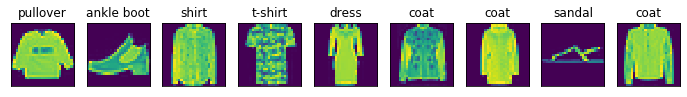

In [31]:
def show_fashion_mnist(images, labels):
    set_figsize()
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy()) 
        f.set_title(lbl) 
        f.axes.get_xaxis().set_visible(False) 
        f.axes.get_yaxis().set_visible(False)

X, y = mnist_train[0:9] 
show_fashion_mnist(X, get_fashion_mnist_labels(y))
plt.show()

### 3.5.2 读取⼩批量
在实践中，数据读取经常是训练的性能瓶颈，特别当模型较简单或者计算硬件性能较⾼时。Gluon的`DataLoader`中⼀个很⽅便的功能是允许使⽤多进程来加速数据读取。这⾥我们通过参数`num_workers`来设置4个进程读取数据。

此外，我们通过`ToTensor`实例将图像数据从uint8格式变换成32位浮点数格式，并除以255使得所有像素的数值均在0到1之间。ToTensor实例还将图像通道从最后⼀维移到最前⼀维来⽅便之后介绍的卷积神经⽹络计算。通过数据集的`transform_first`函数，我们将`ToTensor`的变换应⽤在每个数据样本(图像和标签)的第⼀个元素，即图像之上。

In [32]:
batch_size = 256
transformer = gdata.vision.transforms.ToTensor() 
num_workers = 4
train_iter = gdata.DataLoader(mnist_train.transform_first(transformer), batch_size, shuffle=True, num_workers=num_workers) 
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer), batch_size, shuffle=False, num_workers=num_workers)

In [33]:
# 查看读取⼀遍训练数据需要的时间
start = time()
for X, y in train_iter:
    continue 
'%.2f sec' % (time() - start)

'4.06 sec'

我们将获取并读取Fashion-MNIST数据集的逻辑封装在d2lzh. load_data_fashion_mnist函数中供后⾯章节调⽤。该函数将返回train_iter和test_iter两个变量。 

## 3.6 softmax回归的从零开始实现

### 3.6.1 获取和读取数据
我们将使⽤Fashion-MNIST数据集，并设置批量⼤小为256。

In [34]:
batch_size = 256 
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 3.6.2 初始化模型参数
已知每个样本输⼊是⾼和宽均为28像素的图像。模型的输⼊向量的⻓度是`28 × 28 = 784`：该向量的每个元素对应图像中每个像素。由于图像有10个类别，单层神经⽹络输出层的输出个数为10，因此softmax回归的权重和偏差参数分别为`784 × 10`和`1 × 10`的矩阵。

In [35]:
num_inputs = 784 
num_outputs = 10

W = nd.random.normal(scale=0.01, shape=(num_inputs, num_outputs)) 
b = nd.zeros(num_outputs)

W.attach_grad() 
b.attach_grad()

### 3.6.3 实现softmax运算
在介绍如何定义softmax回归之前，我们先描述⼀下对如何对多维NDArray按维度操作。我们可以只对NDArray其中同⼀列`axis=0`或同⼀⾏`axis=1`的元素求和，并在结果中保留⾏和列这两个维度`keepdims=True`。

In [36]:
X = nd.array([[1, 2, 3], [4, 5, 6]]) 
X.sum(axis=0, keepdims=True), X.sum(axis=1, keepdims=True)

(
 [[5. 7. 9.]]
 <NDArray 1x3 @cpu(0)>, 
 [[ 6.]
  [15.]]
 <NDArray 2x1 @cpu(0)>)

下⾯我们定义softmax运算了。在下⾯的函数中，矩阵X的⾏数是样本数，列数是输出个数。为了表达样本预测各个输出的概率，softmax运算会先通过`exp`函数对每个元素做指数运算，再对`exp`矩阵同⾏元素求和，最后令矩阵每⾏各元素与该⾏元素之和相除。这样⼀来，最终得到的矩阵每⾏元素和为1且⾮负。因此，该矩阵每⾏都是合法的概率分布。softmax运算的输出矩阵中的任意⼀⾏元素代表了⼀个样本在各个输出类别上的预测概率。

In [37]:
def softmax(X):
    X_exp = X.exp() 
    partition = X_exp.sum(axis=1, keepdims=True) 
    return X_exp / partition

对于随机输⼊，我们将每个元素变成了⾮负数，且每⼀⾏和为1：

In [38]:
X = nd.random.normal(shape=(2, 5)) 
X_prob = softmax(X) 
X_prob, X_prob.sum(axis=1)

(
 [[0.1393796  0.20005593 0.3221857  0.16746451 0.1709143 ]
  [0.09240135 0.09818196 0.08506123 0.5392497  0.18510573]]
 <NDArray 2x5 @cpu(0)>, 
 [1. 1.]
 <NDArray 2 @cpu(0)>)

### 3.6.4 定义模型
定义上节描述的softmax回归模型。

In [39]:
def net(X):
    return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)

### 3.6.5 定义损失函数
我们介绍了softmax回归使⽤的交叉熵损失函数。为了得到标签的预测概率，我们可以使⽤`pick`函数。在下⾯的例⼦中，变量`y_hat`是2个样本在3个类别的预测概率，变量`y`是这2个样本的标签类别。通过使⽤`pick`函数，我们得到了2个样本的标签的预测概率。与“softmax回归” ⼀节数学表述中标签类别离散值从1开始逐⼀递增不同，在代码中，标签类别的离散值是从0开始逐⼀递增的。

In [40]:
y_hat = nd.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]]) 
y = nd.array([0, 2], dtype='int32') 
nd.pick(y_hat, y)


[0.1 0.5]
<NDArray 2 @cpu(0)>

下⾯实现了交叉熵损失函数。

In [41]:
def cross_entropy(y_hat, y):
    return -nd.pick(y_hat, y).log()

### 3.6.6 计算分类准确率
给定⼀个类别的预测概率分布`y_hat`，我们把预测概率最⼤的类别作为输出类别。如果它与真实类别`y`⼀致，说明这次预测是正确的。分类准确率即正确预测数量与总预测数量之⽐。

为了演⽰准确率的计算，下⾯定义准确率accuracy函数。

In [42]:
def accuracy(y_hat, y):
    # 由于标签类型为整数，我们先将变量y变换为浮点数再进⾏相等条件判断
    return (y_hat.argmax(axis=1) == y.astype('float32')).mean().asscalar()

In [43]:
accuracy(y_hat, y)

0.5

类似地，我们可以评价模型`net`在数据集`data_iter`上的准确率。

In [44]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0 
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size 
    return acc_sum / n

因为我们随机初始化了模型`net`，所以这个随机模型的准确率应该接近于类别个数10的倒数0.1。

In [45]:
evaluate_accuracy(test_iter, net)

0.058

### 3.6.7 训练模型
使⽤小批量随机梯度下降来优化模型的损失函数。 

In [46]:
num_epochs, lr = 5, 0.1

def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, trainer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0 
        for X, y in train_iter:
            with autograd.record():
                y_hat = net(X) 
                l = loss(y_hat, y).sum() 
            l.backward() 
            if trainer is None:
                d2l.sgd(params, lr, batch_size) 
            else:
                trainer.step(batch_size) # “softmax回归的简洁实现”⼀节将⽤到 
            y = y.astype('float32') 
            train_l_sum += l.asscalar() 
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar() 
            n += y.size
        test_acc = evaluate_accuracy(test_iter, net) 
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f' % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1, loss 0.7881, train acc 0.745, test acc 0.802
epoch 2, loss 0.5739, train acc 0.811, test acc 0.818
epoch 3, loss 0.5299, train acc 0.824, test acc 0.832
epoch 4, loss 0.5061, train acc 0.830, test acc 0.836
epoch 5, loss 0.4903, train acc 0.834, test acc 0.841


## 3.7 softmax回归的简洁实现
本节使⽤Gluon来实现⼀个softmax回归模型。

### 3.7.1 获取和读取数据
我们仍然使⽤Fashion-MNIST数据集和上⼀节中设置的批量⼤小。

In [47]:
batch_size = 256 
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 3.7.2 定义和初始化模型
softmax回归的输出层是⼀个全连接层，我们添加⼀个输出个数为10的全连接层。我们使⽤均值为0、标准差为0.01的正态分布随机初始化模型的权重参数。

In [48]:
net = nn.Sequential()
net.add(nn.Dense(10)) 
net.initialize(init.Normal(sigma=0.01))

### 3.7.3 softmax和交叉熵损失函数
如果做了上⼀节的练习，那么你可能意识到了分开定义softmax运算和交叉熵损失函数可能会造成数值不稳定。因此，Gluon提供了⼀个包括softmax运算和交叉熵损失计算的函数。它的数值稳定性更好。

In [49]:
loss = gloss.SoftmaxCrossEntropyLoss()

### 3.7.4 定义优化算法
我们使⽤学习率为0.1的小批量随机梯度下降作为优化算法。

In [50]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

### 3.7.5 训练模型
我们使⽤上⼀节中定义的训练函数来训练模型。

In [51]:
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 0.7900, train acc 0.745, test acc 0.806
epoch 2, loss 0.5757, train acc 0.811, test acc 0.822
epoch 3, loss 0.5294, train acc 0.823, test acc 0.823
epoch 4, loss 0.5052, train acc 0.830, test acc 0.836
epoch 5, loss 0.4896, train acc 0.834, test acc 0.838


## 3.8 多层感知机
本节以多层感知机(multilayer perceptron，MLP)为例，介绍多层神经⽹络的概念。

### 3.8.1 隐藏层
多层感知机在单层神经⽹络的基础上引⼊了⼀到多个隐藏层。隐藏层位于输⼊层和输出层之间。`图3.3`展⽰了⼀个多层感知机的神经⽹络图。

<img src="images/03_03.png" style="width:500px;"/>

由`图3.3`可⻅，隐藏层中的神经元和输⼊层中各个输⼊完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。

具体来说，给定一个小批量样本$\boldsymbol{X} \in \mathbb{R}^{n \times d}$，其批量大小为$n$，输入个数为$d$。假设多层感知机只有一个隐藏层，其中隐藏单元个数为$h$。记隐藏层的输出（也称为隐藏层变量或隐藏变量）为$\boldsymbol{H}$，有$\boldsymbol{H} \in \mathbb{R}^{n \times h}$。因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别为$\boldsymbol{W}_h \in \mathbb{R}^{d \times h}$和 $\boldsymbol{b}_h \in \mathbb{R}^{1 \times h}$，输出层的权重和偏差参数分别为$\boldsymbol{W}_o \in \mathbb{R}^{h \times q}$和$\boldsymbol{b}_o \in \mathbb{R}^{1 \times q}$。

对于含单隐藏层的多层感知机，其输出$\boldsymbol{O} \in \mathbb{R}^{n \times q}$的计算为
$$\displaystyle\begin{aligned} \boldsymbol{H} &= \boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h, \\ \boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o, \end{aligned}
$$

也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个式子联立起来，可以得到
$$ \boldsymbol{O} = (\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h)\boldsymbol{W}_o + \boldsymbol{b}_o = \boldsymbol{X} \boldsymbol{W}_h\boldsymbol{W}_o + \boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o. $$

从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络：其中输出层权重参数为$\boldsymbol{W}_h\boldsymbol{W}_o$，偏差参数为$\boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o$。不难发现，即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。

### 3.8.2 激活函数
上述问题的根源在于全连接层只是对数据做仿射变换(affine transformation)，而多个仿射变换的叠加仍然是⼀个仿射变换。解决问题的⼀个⽅法是引⼊⾮线性变换，这个⾮线性函数被称为`激活函数`(activation function)。

##### ReLU函数
ReLU(rectified linear unit)函数提供了⼀个很简单的⾮线性变换。给定元素$x$，该函数定义为
+ $\text{ReLU}(x) = \max(x, 0)$

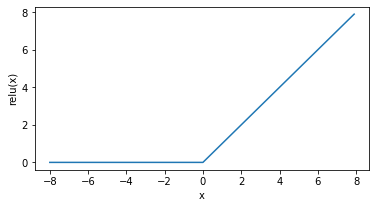

In [52]:
def xyplot(x_vals, y_vals, name):
    set_figsize(figsize=(6, 3)) 
    plt.plot(x_vals.asnumpy(), y_vals.asnumpy()) 
    plt.xlabel('x') 
    plt.ylabel(name + '(x)')
    plt.show()

x = nd.arange(-8.0, 8.0, 0.1) 
x.attach_grad() 

with autograd.record():
    y = x.relu() 

xyplot(x, y, 'relu')

当输⼊为负数时，ReLU函数的导数为0；当输⼊为正数时，ReLU函数的导数为1。尽管输⼊为0时ReLU函数不可导，但是我们可以取此处的导数为0。

下⾯绘制ReLU函数的导数。

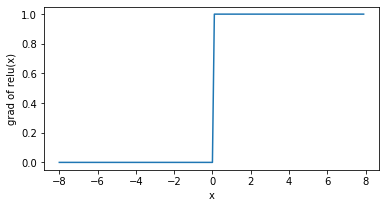

In [53]:
y.backward() 
xyplot(x, x.grad, 'grad of relu')

##### sigmoid函数
sigmoid函数可以将元素的值变换到0和1之间：
+ $\displaystyle \text{sigmoid}(x) = \frac{1}{1 + \exp(-x)}$

sigmoid函数在早期的神经⽹络中较为普遍，但它⽬前逐渐被更简单的ReLU函数取代。

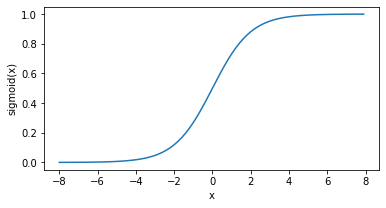

In [54]:
with autograd.record(): 
    y = x.sigmoid() 
xyplot(x, y, 'sigmoid')

依据链式法则，sigmoid函数的导数
+ $\text{sigmoid}'(x) = \text{sigmoid}(x)\left(1-\text{sigmoid}(x)\right)$

下⾯绘制了sigmoid函数的导数。当输⼊为0时，sigmoid函数的导数达到最⼤值0.25；当输⼊越偏离0时，sigmoid函数的导数越接近0。

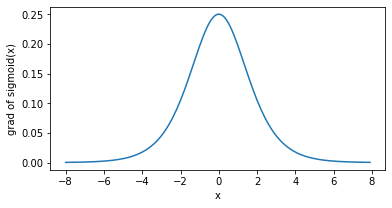

In [55]:
y.backward() 
xyplot(x, x.grad, 'grad of sigmoid')

##### tanh函数
tanh(双曲正切)函数可以将元素的值变换到-1和1之间：
+ $\displaystyle\text{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}$

绘制tanh函数，当输⼊接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。

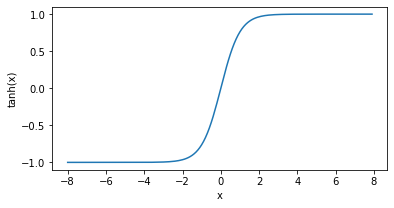

In [56]:
with autograd.record():
    y = x.tanh()
xyplot(x, y, 'tanh')

依据链式法则，tanh函数的导数
+ $\text{tanh}'(x) = 1 - \text{tanh}^2(x)$

绘制了tanh函数的导数。当输⼊为0时，tanh函数的导数达到最⼤值1；当输⼊越偏离0时，tanh函数的导数越接近0。

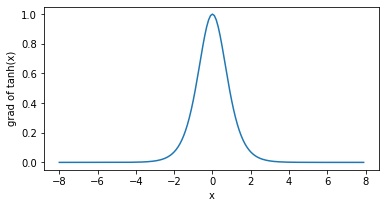

In [57]:
y.backward() 
xyplot(x, x.grad, 'grad of tanh')

### 3.8.3 多层感知机
多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。多层感知机按以下方式计算输出：
$$\displaystyle \begin{aligned} \boldsymbol{H} &= \phi(\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h),\\ \boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o, \end{aligned} $$

其中$\phi$表示激活函数。在分类问题中，我们可以对输出$\boldsymbol{O}$做softmax运算，并使用softmax回归中的交叉熵损失函数。 在回归问题中，我们将输出层的输出个数设为1，并将输出$\boldsymbol{O}$直接提供给线性回归中使用的平方损失函数。


## 3.9 多层感知机的从零开始实现
本节从零实现⼀个多层感知机。

### 3.9.1 获取和读取数据
这⾥继续使⽤Fashion-MNIST数据集。

In [58]:
batch_size = 256 
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 3.9.2 定义模型参数
Fashion-MNIST数据集中图像形状为$28 \times 28$，类别数为10。我们使用长度为$28 \times 28 = 784$的向量表示每一张图像。因此，输入个数为784，输出个数为10。实验中，我们设超参数隐藏单元个数为256。

In [59]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens)) 
b1 = nd.zeros(num_hiddens) 
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs)) 
b2 = nd.zeros(num_outputs)

params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

### 3.9.3 定义激活函数
使⽤基础的maximum函数来实现ReLU，而⾮直接调⽤relu函数。

In [60]:
def relu(X):
    return nd.maximum(X, 0)

### 3.9.4 定义模型
同softmax回归⼀样，我们通过`reshape`函数将每张原始图像改成⻓度为`num_inputs`的向量。

In [61]:
def net(X):
    X = X.reshape((-1, num_inputs)) 
    H = relu(nd.dot(X, W1) + b1) 
    return nd.dot(H, W2) + b2

### 3.9.5 定义损失函数
为了得到更好的数值稳定性，我们直接使⽤Gluon提供的包括softmax运算和交叉熵损失计算的函数。

In [62]:
loss = gloss.SoftmaxCrossEntropyLoss()

### 3.9.6 训练模型
调⽤d2lzh包中的`train_ch3`函数，设超参数迭代周期数为5，学习率为0.5。

In [63]:
num_epochs, lr = 5, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.8178, train acc 0.693, test acc 0.818
epoch 2, loss 0.4921, train acc 0.815, test acc 0.832
epoch 3, loss 0.4272, train acc 0.842, test acc 0.853
epoch 4, loss 0.3983, train acc 0.853, test acc 0.858
epoch 5, loss 0.3729, train acc 0.862, test acc 0.871


## 3.10 多层感知机的简洁实现
使⽤Gluon来实现上⼀节中的多层感知机。

### 3.10.1 定义模型
和softmax回归唯⼀的不同在于，我们多加了⼀个全连接层作为隐藏层。它的隐藏单元个数为256， 并使⽤ReLU函数作为激活函数。

In [64]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'), nn.Dense(10)) 
net.initialize(init.Normal(sigma=0.01))

### 3.10.2 读取数据并训练模型
我们使⽤与`softmax回归的简洁实现`⼀节中训练softmax回归⼏乎相同的步骤来读取数据并训练模型。

In [65]:
batch_size = 256 

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gloss.SoftmaxCrossEntropyLoss() 
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5}) 

num_epochs = 5 
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 0.8160, train acc 0.696, test acc 0.812
epoch 2, loss 0.4962, train acc 0.816, test acc 0.848
epoch 3, loss 0.4345, train acc 0.840, test acc 0.849
epoch 4, loss 0.3992, train acc 0.852, test acc 0.870
epoch 5, loss 0.3794, train acc 0.859, test acc 0.870
